Nuclear pores as versatile reference standards for quantitative superresolution microscopy
1.  https://pmc.ncbi.nlm.nih.gov/articles/PMC6768092/

In [1]:
from AMS_BP.configio.configmodels import CellParameters

cellp = CellParameters(cell_type="RectangularCell",params = {"bounds":[4, 7, 3, 9,-0.5,0.5]})

print(cellp)

cell_type='RectangularCell' params={'bounds': [4, 7, 3, 9, -0.5, 0.5]}


In [2]:
from AMS_BP.configio.convertconfig import make_cell

rcell = make_cell(cellp)
print(
    rcell
)

RectangularCell(mesh=PolyData (0x145843340)
  N Cells:    12
  N Points:   8
  N Strips:   0
  X Bounds:   4.000e+00, 7.000e+00
  Y Bounds:   3.000e+00, 9.000e+00
  Z Bounds:   -5.000e-01, 5.000e-01
  N Arrays:   2, bounds=[4, 7, 3, 9, -0.5, 0.5])


In [3]:
sample_plane_dim = [
    10,
    10,
]  # in um. Describes the size of the plane on which the sample is placed.
cycle_count = 1000  # Number of cycles to run the simulation for. (this would be the # of frames in a movies if a time series)
# cycle_count is 1 for each exposure_time + interval_time in the simulation.
exposure_time = 20  # in ms
interval_time = 0  # in ms
oversample_motion_time = 10  # this is the smallest time step in the simulation for the motion of the molecules. Both the exposure_time and interval_time need to be equal to or larger than this, or be 0.

from AMS_BP.configio.convertconfig import GlobalParameters

globalp = GlobalParameters(
    sample_plane_dim=sample_plane_dim,
    cycle_count=cycle_count,
    exposure_time=exposure_time,
    interval_time=interval_time,
    oversample_motion_time=oversample_motion_time,
)
print(globalp)

sample_plane_dim=array([10., 10.]) cycle_count=1000 exposure_time=20 interval_time=0 oversample_motion_time=10


In [4]:
from AMS_BP.configio.convertconfig import ConfigList
config_list = ConfigList(
    CellParameter = cellp,
    MoleculeParameter = None,
    GlobalParameter = globalp,
    CondensateParameter = None,
    OutputParameter = None,
)

In [5]:
num_of_fluorophores = 1
fluorophore_names = ["PAmCherry"]


In [6]:
from AMS_BP.sample.flurophores.flurophore_schema import Fluorophore, State, StateTransition, SpectralData
# mMaple
mMaple_f = {
    "name" : 'mMaple',
    "initial_state" : "bright_green", # must be one of the defined states below.
}
bright_state_red = State(
            name = "bright_red",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.56, # unitless; 0-1
            extinction_coefficient_lambda_val = 30000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.000000001, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
                    intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [530.0, 583, 600.0, 650.0, 700.0], # in nm
                    intensities = [0.001,1.0,  0.52, 0.25, 0.068], # in arbitrary units
                ),
            )
bright_state_green = State(
            name = "bright_green",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.74, # unitless; 0-1
            extinction_coefficient_lambda_val = 15000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.000000001, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
                    intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [471.0, 490.0, 500.0, 505.0, 520.0, 549.0, 632.0], # in nm
                    intensities = [0.0038, 0.24, 0.86, 1.0, 0.55, 0.25, 0.004], # in arbitrary units
                ),
            )
triplet_state_red = State(
            name = "triplet_red",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
triplet_state_green = State(
            name = "triplet_green",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state_red = State(
            name = "bleached_red",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state_green = State(
            name = "bleached_green",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
transition_gtr = StateTransition(
    from_state = "bright_green",
    to_state = "bright_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [330,350,380,400,420,450], # in nm
        intensities = [0.01,0.5,1.0,0.8,0.5,0.01], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 6500,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,                
    )
transition_rtBr = StateTransition(
    from_state = "bright_red",
    to_state = "bleached_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
        intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_gtBg = StateTransition(
    from_state = "bright_green",
    to_state = "bleached_green",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
        intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_rtTr = StateTransition(
    from_state = "bright_red",
    to_state = "triplet_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
        intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_gtTg = StateTransition(
    from_state = "bright_green",
    to_state = "triplet_green",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
        intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_Trtr = StateTransition(
    from_state = "triplet_red",
    to_state = "bright_red",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_Tgtg = StateTransition(
    from_state = "triplet_green",
    to_state = "bright_green",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TrtBr = StateTransition(
    from_state = "triplet_red",
    to_state = "bleached_red",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TgtBg = StateTransition(
    from_state = "triplet_green",
    to_state = "bleached_green",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transitions = {
    "bright_greenbright_red" : transition_gtr,
    "bright_redbleached_red" : transition_rtBr,
    "bright_greenbleached_green" : transition_gtBg,
    "bright_redtriplet_red" : transition_rtTr,
    "bright_greentriplet_green" : transition_gtTg,
    "triplet_redbright_red" : transition_Trtr,
    "triplet_greenbright_green" : transition_Tgtg,
    "triplet_redbleached_red" : transition_TrtBr,
    "triplet_greenbleached_green" : transition_TgtBg,
}
# fluorophore definition
fmMaple = Fluorophore(
    name = mMaple_f['name'],
    initial_state = bright_state_green,
    states = {
        "bright_red" : bright_state_red,
        "bright_green" : bright_state_green,
        "bleached_red" : bleached_state_red,
        "bleached_green" : bleached_state_green,
        "triplet_red" : triplet_state_red,
        "triplet_green" : triplet_state_green,
        },
    transitions = transitions,
    )
print(fmMaple)

name='mMaple' states={'bright_red': State(name='bright_red', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[325.0, 411.0, 569.0, 611.0, 612.0], values=[0.355, 0.033, 1.0, 0.0075, 0.0068], cache_values={325.0: 0.355, 411.0: 0.033, 569.0: 1.0, 611.0: 0.0075, 612.0: 0.0068}), emission_spectrum=SpectralData(wavelengths=[530.0, 583.0, 600.0, 650.0, 700.0], values=[0.001, 1.0, 0.52, 0.25, 0.068], cache_values={530.0: 0.001, 583.0: 1.0, 600.0: 0.52, 650.0: 0.25, 700.0: 0.068}), quantum_yield_lambda_val=0.56, quantum_yield=WavelengthDependentProperty(wavelengths=[530.0, 583.0, 600.0, 650.0, 700.0], values=[0.0005600000000000001, 0.56, 0.2912, 0.14, 0.03808000000000001], cache_values={530.0: 0.0005600000000000001, 583.0: 0.56, 600.0: 0.2912, 650.0: 0.14, 700.0: 0.03808000000000001}), extinction_coefficient_lambda_val=30000.0, extinction_coefficient=WavelengthDependentProperty(wavelengths=[325.0, 411.0, 569.0, 611.0, 612.0], values=[10650.0, 990.

In [7]:
# Quantum efficiency curve (wavelength in nm : efficiency 0-1)
# extrapotation for wavelengths not included uses edge values
quantum_efficiency = [
    [
        399,
        0.00,
    ],
    [
        400,
        0.80,
    ],
    [
        500,
        0.90,
    ],
    [
        600,
        0.95,
    ],
    [
        700,
        0.90,
    ],
    [
        800,
        0.70,
    ],
    [
        900,
        0.40,
    ],
    [
        901,
        0.00,
    ],
]
wavelength_qe = {pair[0]: pair[1] for pair in quantum_efficiency}


from AMS_BP.optics.camera.quantum_eff import QuantumEfficiency
quantum_efficiency = QuantumEfficiency(wavelength_qe=wavelength_qe)
print(quantum_efficiency)

QuantumEfficiency(wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0}, _cached_wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0})


In [8]:
from AMS_BP.optics.camera.detectors import CMOSDetector
pixel_count = [190, 190]  # [width, height], 1200x1200 (x pixel_size)
pixel_detector_size = 6.5 # um
magnification = 100
dark_current = 0.0005     # electrons/pixel/second
readout_noise = 1.6       # electrons RMS
bit_depth = 16
sensitivity = 1.0         # electrons/ADU
base_adu = 100            #ADU
binning_size = 1          # 1x1 , if 2 then 2x2
detector = CMOSDetector(
    pixel_count=pixel_count,
    pixel_detector_size=pixel_detector_size,
    magnification=magnification,
    dark_current=dark_current,
    readout_noise=readout_noise,
    bit_depth=bit_depth,
    sensitivity=sensitivity,
    base_adu=base_adu,
    binning_size=binning_size,
    pixel_size = pixel_detector_size/magnification,
)
print(detector)

In [9]:
from AMS_BP.optics.psf.psf_engine import PSFEngine, PSFParameters
from typing import Optional

params_config = {
    "numerical_aperture": 1.4,
    "refractive_index": 1.0,
    # "pinhole_diameter": 0.002, # do not include is no pinhole.
}


def make_psf(params_config: dict, pixel_size: int | float) -> PSFEngine:
    def Partial_PSFengine(
                wavelength: int | float, z_step: Optional[int | float] = None
            ):
                # Create PSFParameters instance
                parameters = PSFParameters(
                    emission_wavelength=wavelength,
                    numerical_aperture=float(params_config["numerical_aperture"]),
                    pixel_size=pixel_size,
                    z_step=float(params_config["z_step"]) if z_step is None else z_step,
                    refractive_index=float(params_config.get("refractive_index", 1.0)),
                    pinhole_diameter=params_config.get("pinhole_diameter", None),
                )

                # Create PSF engine
                psf_engine = PSFEngine(parameters)
                return psf_engine
    return Partial_PSFengine
psf_generator = make_psf(params_config, pixel_size=(pixel_detector_size/magnification))
print(psf_generator)

<function make_psf.<locals>.Partial_PSFengine at 0x145892340>


In [10]:
from AMS_BP.optics.filters.channels.channelschema import Channels
from AMS_BP.optics.filters.filters import create_allow_all_filter, create_bandpass_filter, FilterSet

In [11]:
c1filterset = FilterSet(
    name = "c1",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 600.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
c2filterset = FilterSet(
    name = "c2",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 500.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
channels = Channels(
    filtersets = [c1filterset, c2filterset],
    num_channels = 2,
    splitting_efficiency = [1,1],
    names = ["c1", "c2"],
)

### Define Functions for Laser Modulation

In [12]:
from AMS_BP.optics.lasers.laser_profiles import LaserParameters, WidefieldBeam, GaussianBeam

# two lasers, 405 and 600 nm both widefield
laser_params_600 = LaserParameters(
    power = 50000,           # Power in watts 
    wavelength = 600,         # Wavelength in nanometers
    beam_width = 5.0,         # 1/e² beam width at waist in microns
    numerical_aperture = 1.4, # NA of focusing lens
    refractive_index = 1.518,
)

def lpb(t):
    # t in s
    if t <=0.02:
        return 0
    else:
        return 0.05

laser_params_405 = LaserParameters(
    power = 5,
    wavelength = 405,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,
)
wide600 = WidefieldBeam(laser_params_600)
wide405 = WidefieldBeam(laser_params_405)
print(wide600, wide405)
lasers = {"blue": wide405, "red": wide600}

<AMS_BP.optics.lasers.laser_profiles.WidefieldBeam object at 0x1458abb60> <AMS_BP.optics.lasers.laser_profiles.WidefieldBeam object at 0x1458aaa50>


In [13]:
from AMS_BP.configio.convertconfig import make_sample, make_condensatedict, make_samplingfunction, gen_initial_positions, create_track_generator, get_tracks, add_tracks_to_sample

Make custom molecule positions/trajectories for NPC-Nup96. 

From: https://pmc.ncbi.nlm.nih.gov/articles/PMC6768092/.
<img src="f1.jpeg" width="500"/>

> 36 total Nup96 molecules.

> 16 nuclear side, 16 cytoplasmic side.

> 8-sided NPC. 2 rings of octomer, 2 molecules per section.

> Ring diameter: 107 nm.

> Section diameter: 12 nm.

> Ring spacing: 50 nm.


In [14]:
import numpy as np

In [15]:
def generate_nup96_positions(ring_diameter: float=107.0, molecule_spacing: float=12.0, ring_spacing: float=50.0) -> np.ndarray:
    """
    Generate the 3D coordinates of Nup96 proteins in the nuclear pore complex.
    
    Parameters:
    -----------
    ring_diameter : float
        Diameter of the main ring in nanometers (default: 107.0 nm)
    molecule_spacing : float
        Distance between two Nup96 molecules within same section (default: 12.0 nm)
    ring_spacing : float
        Distance between nuclear and cytoplasmic rings in z-direction (default: 50.0 nm)
        
    Returns:
    --------
    numpy.ndarray
        Array of shape (32, 3) containing x, y, z coordinates for all Nup96 proteins in um
        First 32 coordinates are the main structural Nup96 (16 nuclear, 16 cytoplasmic)
    """
    
    # Initialize array to store coordinates
    coordinates = np.zeros((32, 3))
    ring_radius = ring_diameter / 2
    
    # Generate positions for both main rings (nuclear and cytoplasmic)
    for ring in range(2):  # 0 = nuclear side, 1 = cytoplasmic side
        z = ring_spacing/2 if ring == 0 else -ring_spacing/2
        
        for octant in range(8):
            # Calculate base angle for this octant
            base_angle = octant * 2 * np.pi / 8
            
            # Calculate the center position of this octamer
            center_x = ring_radius * np.cos(base_angle)
            center_y = ring_radius * np.sin(base_angle)
            
            # Place two Nup96 molecules in each octant section
            for molecule in range(2):
                # Calculate the offset direction perpendicular to the radius
                perpendicular_angle = base_angle + np.pi/2 + molecule_spacing/3 * (1 if molecule == 0 else -1)
                
                # Offset from center position
                offset = (molecule_spacing/3) * (-1 if molecule == 0 else 1) + (molecule_spacing/5) * (-1 if ring == 0 else 1)
                
                # Calculate final x and y coordinates
                x = center_x + offset * np.cos(perpendicular_angle)
                y = center_y + offset * np.sin(perpendicular_angle)
                
                # Store coordinates
                idx = ring * 16 + octant * 2 + molecule
                coordinates[idx] = [x, y, z]
                # add 1 nm gitter
                coordinates[idx] += np.random.normal(0, 1, 3)
    
    return coordinates/1000.


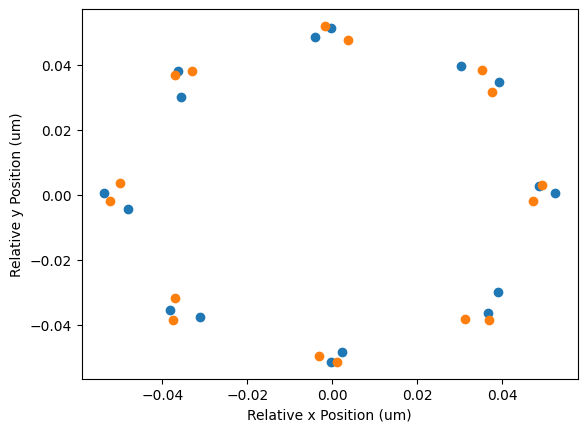

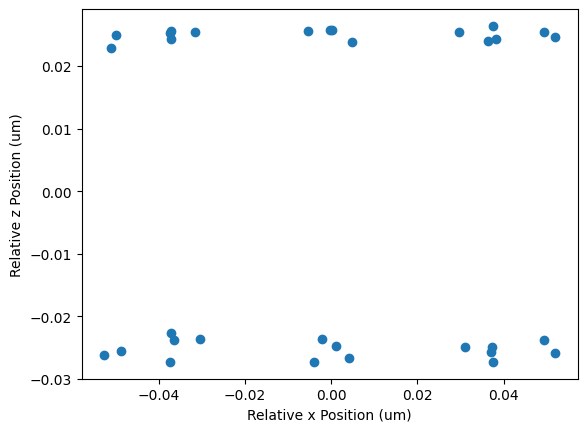

In [16]:

import matplotlib.pyplot as plt

plt.plot(generate_nup96_positions()[:,0][:16], generate_nup96_positions()[:,1][:16], 'o')
plt.plot(generate_nup96_positions()[:,0][16:], generate_nup96_positions()[:,1][16:], 'o')
plt.ylabel('Relative y Position (um)')
plt.xlabel('Relative x Position (um)')
plt.show()
plt.plot(generate_nup96_positions()[:,0][:], generate_nup96_positions()[:,2][:], 'o')
plt.ylabel('Relative z Position (um)')
plt.xlabel('Relative x Position (um)')
plt.show()

In [17]:
# make 10 NPCs top view
num_npc = 20
tracks = [{}]
startingx = np.random.choice(np.linspace(4,7,num_npc*2),size=num_npc,replace=False)
startingy = np.random.choice(np.linspace(4,7,num_npc*2),size=num_npc,replace=False)
for i in range(num_npc):
    npc = generate_nup96_positions()
    #x_add 
    npc[:,0] += startingx[i]
    #y_add
    npc[:,1] += startingy[i]

    for j in range(len(npc)):
        tracks[0][j+i*len(npc)] = {"xy": [npc[j]] * int(globalp.cycle_count * (globalp.exposure_time + globalp.interval_time)/globalp.oversample_motion_time), "frames": np.arange(0,globalp.cycle_count * (globalp.exposure_time + globalp.interval_time),globalp.oversample_motion_time)}

In [18]:
# # make 10 NPCs side view
# num_npc = 20
# tracks = [{}]
# startingx = np.random.choice(np.linspace(4,7,num_npc*2),size=num_npc,replace=False)
# startingy = np.random.choice(np.linspace(4,7,num_npc*2),size=num_npc,replace=False)
# for i in range(num_npc):
#     npc = generate_nup96_positions()
#     #z_add 
#     npc[:,2] += startingx[i]
#     #y_add
#     npc[:,1] += startingy[i]

#     # reorder the axis. 
#     npc = npc[:, [1,2, 0]]

#     for j in range(len(npc)):
#         tracks[0][j+i*len(npc)] = {"xy": [npc[j]] * int(globalp.cycle_count * (globalp.exposure_time + globalp.interval_time)/globalp.oversample_motion_time), "frames": np.arange(0,globalp.cycle_count * (globalp.exposure_time + globalp.interval_time),globalp.oversample_motion_time)}

In [19]:
tracks = [{}]
startingx = np.random.choice(np.linspace(4,7,10),size=1,replace=False)
startingy = np.random.choice(np.linspace(4,7,10),size=1,replace=False)
tracks[0][0] = {'xy': [[startingx[0],startingy[0],0]] * int(globalp.cycle_count * (globalp.exposure_time + globalp.interval_time)/globalp.oversample_motion_time), "frames": np.arange(0,globalp.cycle_count * (globalp.exposure_time + globalp.interval_time),globalp.oversample_motion_time)}

In [20]:
# make initial sample plane
sample_plane = make_sample(
    global_params=config_list.GlobalParameter,
    cell=rcell,
)

# make custom trajectories for NUP96


# add tracks to sample
sample_plane = add_tracks_to_sample(
    tracks=tracks, sample_plane=sample_plane, fluorophore= [fmMaple]
)


In [21]:
from AMS_BP.sim_microscopy import VirtualMicroscope

vm = VirtualMicroscope(
    camera = (detector, quantum_efficiency),
    sample_plane = sample_plane,
    lasers = lasers,
    channels = channels,
    psf = psf_generator,
    config = config_list,
)

In [22]:
# reset the microscope
vm.reset_to_initial_config()

True

In [23]:
def rectangular_wave(t):
    """
    Generate a periodic rectangular wave with:
    - Peak value: 0.05
    - Peak duration: 0.02 seconds
    - Zero duration: 0.02 seconds
    - Total period: 0.04 seconds
    
    Parameters:
        t (float or numpy.ndarray): Time in seconds
        
    Returns:
        float or numpy.ndarray: Value of rectangular wave at time t
    """
    # Total period is 0.04 seconds (0.02s high + 0.02s low)
    period = 0.04
    
    # Normalize time to within one period
    t_normalized = t % period
    
    # Return 0.05 for first 0.02s of period, 0 for remainder
    return np.where(t_normalized < 0.02, 0.003925, 0)

In [24]:
total_duration = 20000
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={"red": 0.39, "blue": rectangular_wave},
    laser_position={"red": (5, 5,0), "blue": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=20,
    interval_time=0,
)

In [25]:
from tifffile import TiffWriter
with TiffWriter(
    "NPC_MOVIE_v3_mMaple_full2_state_0039_039.ome.tiff", bigtiff=True
) as f:
    f.write(
        frames,
        metadata={"axes": "CTYX"},
    )

In [26]:
from cluster_detection.reconstruction.recon import SMReconstruction

In [27]:
from matplotlib_scalebar.scalebar import ScaleBar
import csv
header = []
data = []
with open("export_full2_0039_039.csv", "r") as f:
    reader = csv.reader(f)
    head = next(reader)
    print(head)
    head = next(reader)
    print(head)
    head = next(reader)
    head = next(reader)
    header = head
    for row in reader:
        data.append([float(row[i]) for i in range(len(row)) if i not in [0,1,2,11]])
data = np.array(data)
print(header)

['LABEL', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y', 'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY', 'MANUAL_SPOT_COLOR', 'MEAN_INTENSITY_CH1', 'MEDIAN_INTENSITY_CH1', 'MIN_INTENSITY_CH1', 'MAX_INTENSITY_CH1', 'TOTAL_INTENSITY_CH1', 'STD_INTENSITY_CH1', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2', 'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2', 'STD_INTENSITY_CH2', 'CONTRAST_CH1', 'SNR_CH1', 'CONTRAST_CH2', 'SNR_CH2']
['Label', 'Spot ID', 'Track ID', 'Quality', 'X', 'Y', 'Z', 'T', 'Frame', 'Radius', 'Visibility', 'Manual spot color', 'Mean intensity ch1', 'Median intensity ch1', 'Min intensity ch1', 'Max intensity ch1', 'Sum intensity ch1', 'Std intensity ch1', 'Mean intensity ch2', 'Median intensity ch2', 'Min intensity ch2', 'Max intensity ch2', 'Sum intensity ch2', 'Std intensity ch2', 'Contrast ch1', 'Signal/Noise ratio ch1', 'Contrast ch2', 'Signal/Noise ratio ch2']
['', '', '', '(quality)', '(pixel)', '(pixel)', '(pixel)', '(sec)', '',

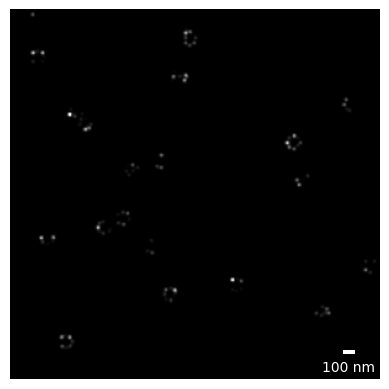

In [28]:
smr_generator = SMReconstruction(
    (190,190),
    65,
    10,
)
max_ref = 2.19
img_widefield = smr_generator.make_reconstruction(np.array(list(zip(data[:,1][:],data[:,2][:]))), 130)
img_palm = smr_generator.make_reconstruction(np.array(list(zip(data[:,1][:],data[:,2][:]))), 10)
img_con = smr_generator.make_reconstruction(np.array(list(zip(data[:,1][:],data[:,2][:]))), 100)
# plt.imshow(img_palm,cmap = "gray")
# # flip y axis on image
# plt.gca().invert_yaxis()
# # plt.xlim(600,700)
# # plt.ylim(600,700)
# plt.grid(False)
# # plt.xlim(500,560)
# # plt.ylim(580,640)
# #from tifffile import imsave
# #imsave("palm_npc_comparison.tif",img_palm)
# plt.show()


fig, ax = plt.subplots()
ax.imshow(img_palm,cmap = "gray")#,vmin = 0, vmax = max_ref)
ax.grid(False)
ax.set_xlim(400,700)
ax.set_ylim(400,700)
# ax.invert_yaxis()
ax.set_axis_off()
scalebar = ScaleBar(10, "nm", label = None, fixed_value=100, color='white', location='lower right',frameon=False)
ax.add_artist(scalebar)
#plt.savefig("palmcloseup_NPC.svg",format = "svg")
plt.show()

Make Figure For Paper

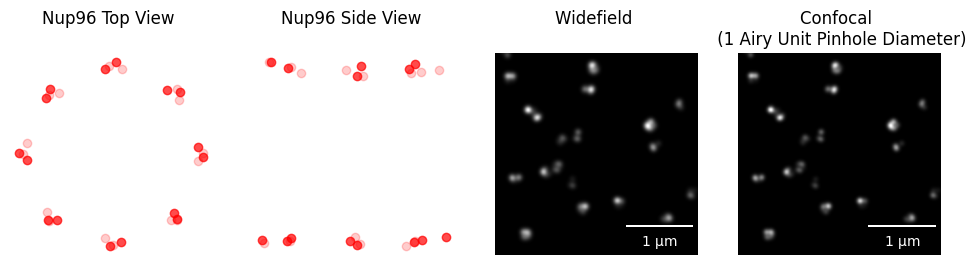

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
# Plot the first image
axes[0].plot(generate_nup96_positions()[:,0][:16], generate_nup96_positions()[:,1][:16], 'ro',alpha=0.7)
axes[0].plot(generate_nup96_positions()[:,0][16:], generate_nup96_positions()[:,1][16:], 'ro',alpha=0.2)

axes[0].set_box_aspect(1)
axes[0].set_axis_off()
axes[0].set_title('Nup96 Top View \n')


axes[1].plot(generate_nup96_positions()[:,1][:16:3], generate_nup96_positions()[:,2][:16:3], 'ro',alpha=0.7)
axes[1].plot(generate_nup96_positions()[:,1][:16:2], generate_nup96_positions()[:,2][:16:2], 'ro',alpha=0.2)
axes[1].plot(generate_nup96_positions()[:,1][16::2], generate_nup96_positions()[:,2][16::2], 'ro',alpha=0.7)
axes[1].plot(generate_nup96_positions()[:,1][16::3], generate_nup96_positions()[:,2][16::3], 'ro',alpha=0.2)

axes[1].set_box_aspect(1)
axes[1].set_axis_off()
axes[1].set_title('Nup96 Side View \n')

axes[2].imshow(img_widefield, cmap='gray')
axes[2].set_box_aspect(1)
axes[2].set_axis_off()
axes[2].set_title('Widefield \n ')
axes[2].set_xlim(400, 700)
axes[2].set_ylim(400, 700)
scalebar = ScaleBar(0.01, "um", label = None, fixed_value=1, color='white', location='lower right',frameon=False)
axes[2].add_artist(scalebar)

axes[3].imshow(img_con, cmap='gray')
axes[3].set_box_aspect(1)
axes[3].set_axis_off()
axes[3].set_title('Confocal \n (1 Airy Unit Pinhole Diameter)')
axes[3].set_xlim(400, 700)
axes[3].set_ylim(400, 700)
scalebar = ScaleBar(0.01, "um", label = None, fixed_value=1, color='white', location='lower right',frameon=False)
axes[3].add_artist(scalebar)
#plt.savefig('plane1_npc.svg', dpi = 300)
#plt.savefig('plane11_npc.svg', dpi = 300)
plt.show()